In [1]:
import missingno         as msno
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
plt.style.use('ggplot')

## Load Data


In [4]:
eui_train = pd.read_csv('train.csv')
eui_test = pd.read_csv('test.csv')

In [5]:
eui_train.drop('id', axis=1, inplace=True)

In [6]:
print('train dataset shape: ', eui_train.shape)
print('test dataset shape: ', eui_test.shape, '\n')

eui_train['Year_Factor'] = eui_train['Year_Factor'].astype('object')


Categorical_features = eui_train.select_dtypes(include='object').columns.to_list()
Numerical_features = eui_train.select_dtypes(include='number').columns.to_list()

print('Categorical Features:', Categorical_features, '\n')
print('Numerical Features:', Numerical_features)

train dataset shape:  (75757, 63)
test dataset shape:  (9705, 63) 

Categorical Features: ['Year_Factor', 'State_Factor', 'building_class', 'facility_type'] 

Numerical Features: ['floor_area', 'year_built', 'energy_star_rating', 'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp', 'august_max_temp', 'september_min_temp', 'september_avg_temp', 'september_max_temp', 'october_min_temp', 'october_avg_temp', 'october_max_temp', 'november_min_temp', 'november_avg_temp', 'november_max_temp', 'december_min_temp', 'december_avg_temp', 'december_max_temp', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches

In [7]:
eui_train.sample(5)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
67603,5,State_8,Residential,Mixed_Use_Commercial_and_Residential,85000.0,1970.0,NaN,18.3,3,24.016129,...,8,95,6,0,0,NaN,NaN,NaN,NaN,121.237189
18152,2,State_6,Commercial,Office_Uncategorized,814121.0,1986.0,91.0,15.2,13,37.322581,...,0,72,17,0,0,NaN,NaN,NaN,NaN,74.166904
33238,4,State_6,Residential,Multifamily_Uncategorized,268000.0,1973.0,45.0,42.7,4,28.596774,...,0,75,4,0,0,1.0,1.0,1.0,NaN,76.279119
66760,4,State_8,Commercial,Education_Other_classroom,200000.0,1950.0,50.0,95.1,3,29.258065,...,0,93,20,0,0,1.0,1.0,1.0,87.0,103.672322
55360,6,State_6,Residential,Multifamily_Uncategorized,182335.0,1972.0,5.0,3.4,11,34.451613,...,1,96,17,0,0,1.0,1.0,1.0,NaN,98.629781


In [23]:
eui_train.describe()

,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
count,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000
mean,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,...,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693
std,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,...,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403
min,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169
25%,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,...,0.000000,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601
50%,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,61.000000,...,0.000000,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716
75%,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,62.000000,...,0.000000,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534
max,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,89.000000,...,31.000000,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120


# Are there any missing values?

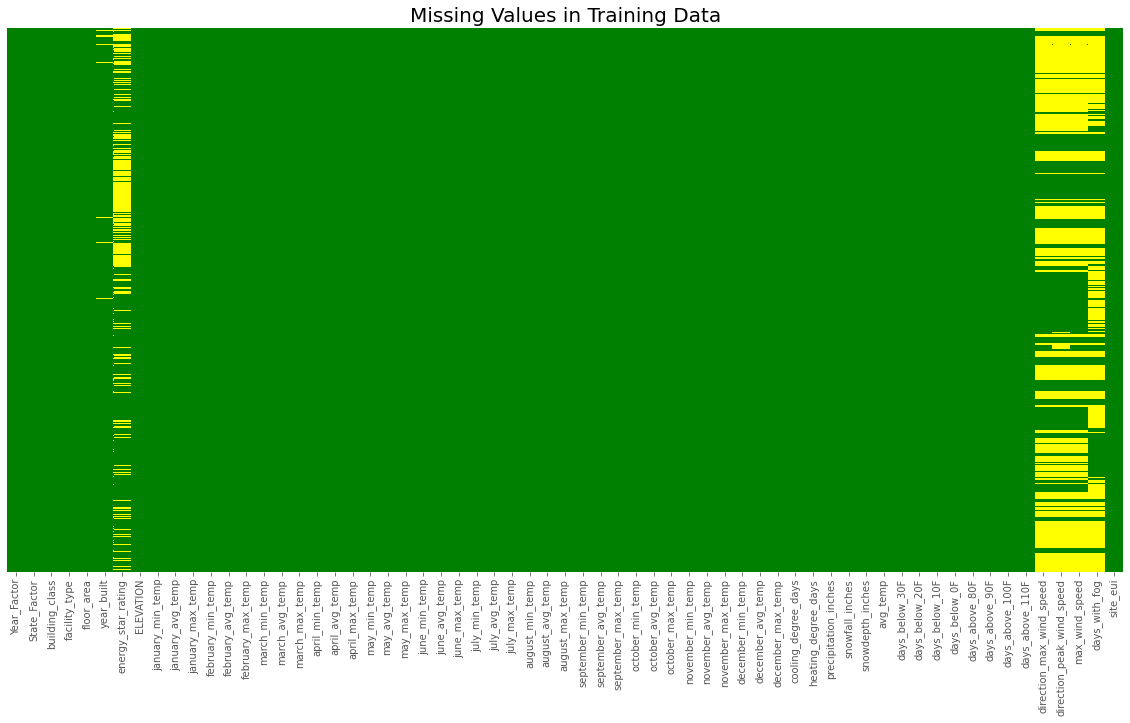

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(eui_train.isna(), cmap=['green', 'yellow'],
            xticklabels=eui_train.columns,
            yticklabels=False,
            cbar=False)
plt.title('Missing Values in Training Data', size=20)
plt.show()

In [9]:
df_miss = eui_train.isnull().sum().sort_values(ascending=False)[:6].to_frame()
df_miss.rename(columns={0:'missing'}, inplace=True)
df_miss['% of missing'] = round((df_miss['missing']/len(eui_train))*100,2)
df_miss.style.background_gradient(cmap='Reds')

,missing,% of missing
days_with_fog,45796,60.450000
direction_peak_wind_speed,41811,55.190000
max_wind_speed,41082,54.230000
direction_max_wind_speed,41082,54.230000
energy_star_rating,26709,35.260000
year_built,1837,2.420000


# Marginal Distributions

## Target Variable (EUI)

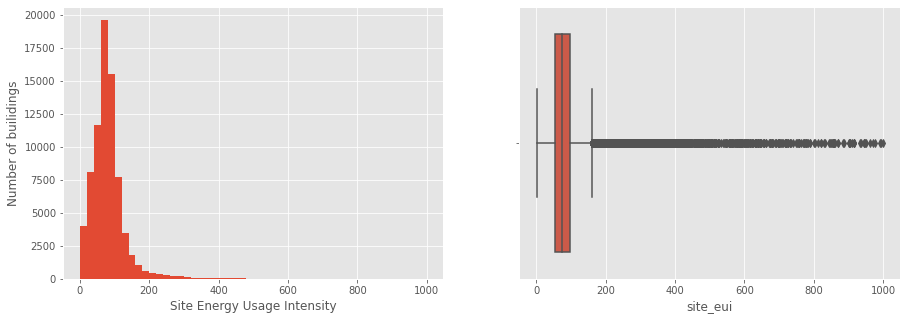

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
eui_train['site_eui'].hist(bins=50)
plt.ylabel('Number of builidings')
plt.xlabel('Site Energy Usage Intensity')


plt.subplot(1, 2, 2)
sns.boxplot(eui_train['site_eui'])



plt.show()

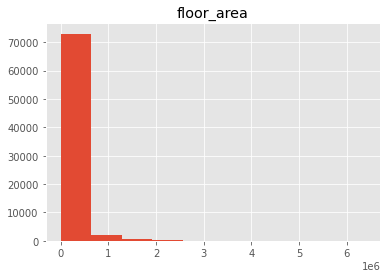

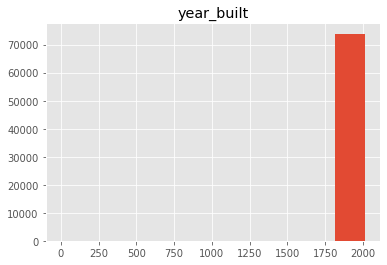

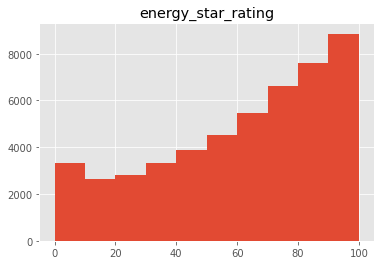

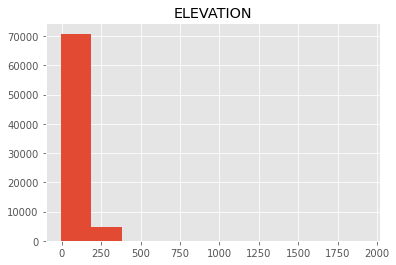

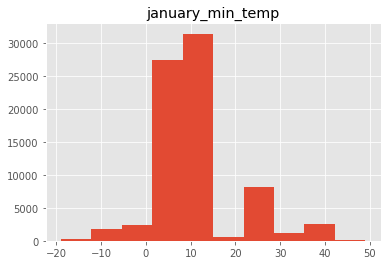

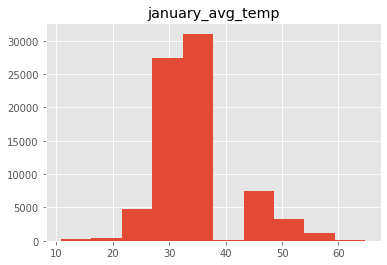

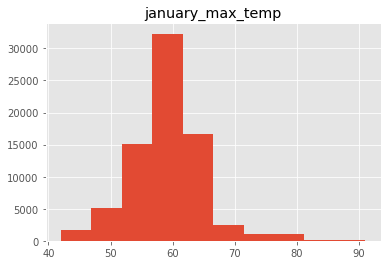

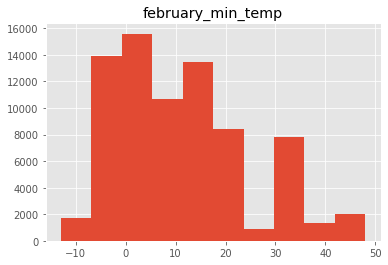

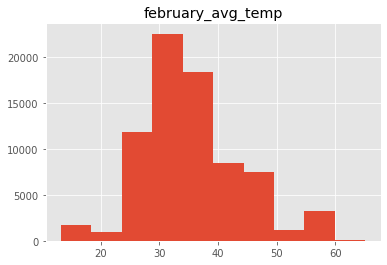

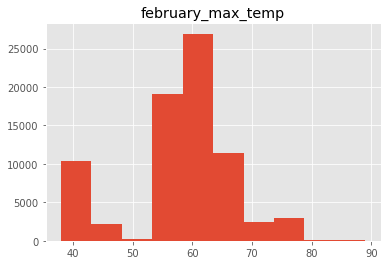

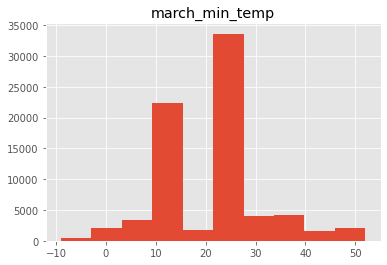

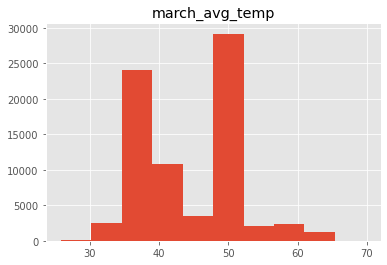

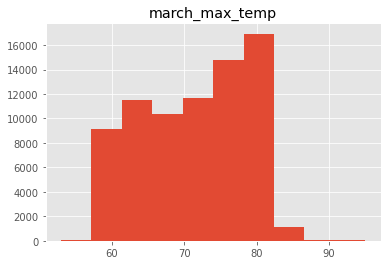

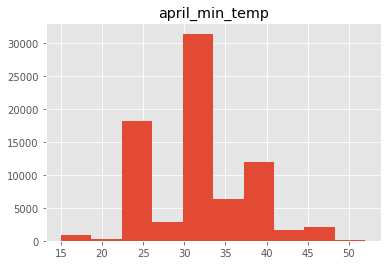

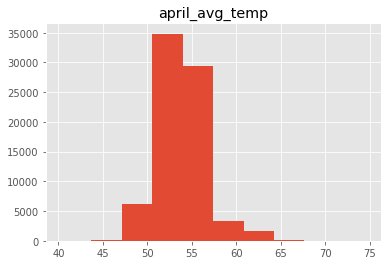

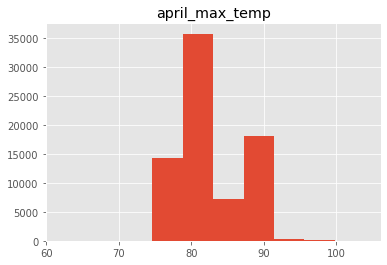

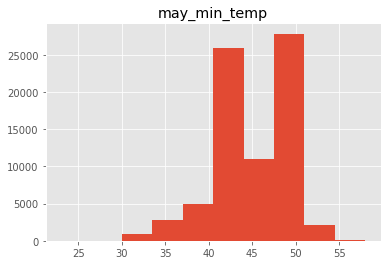

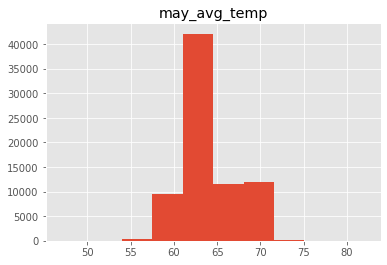

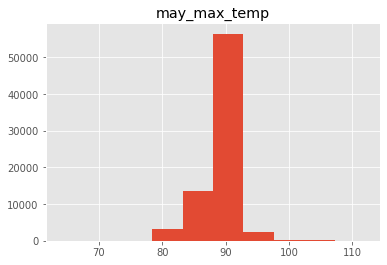

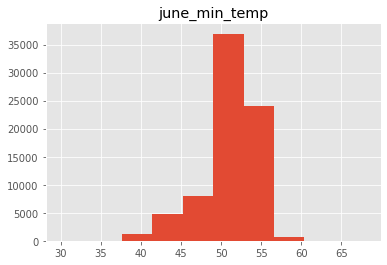

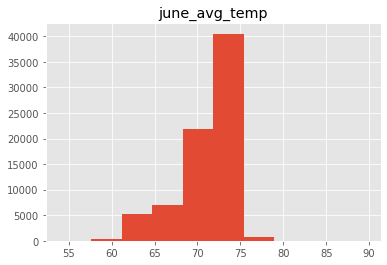

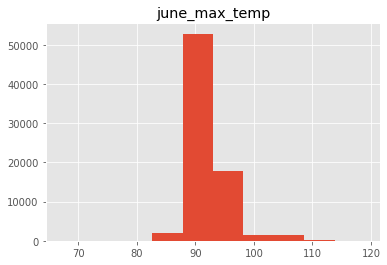

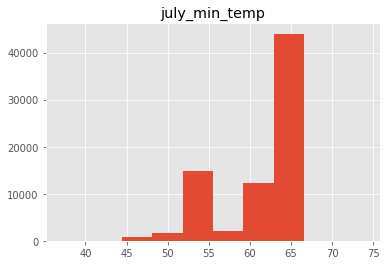

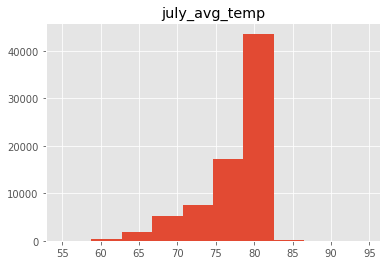

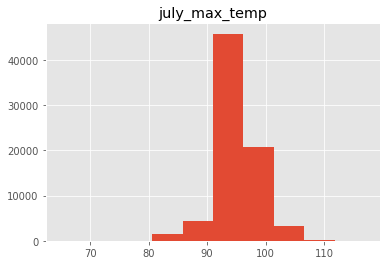

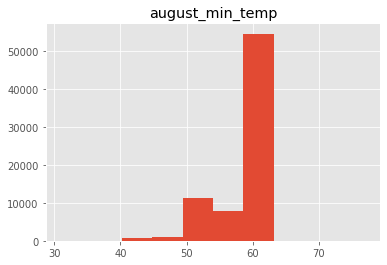

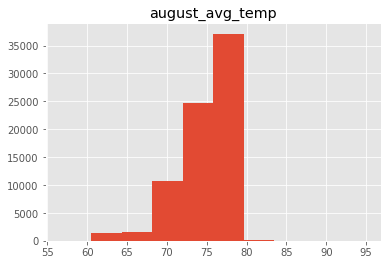

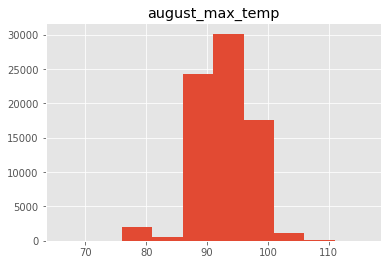

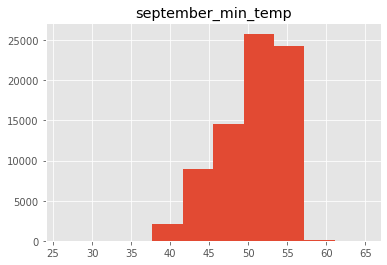

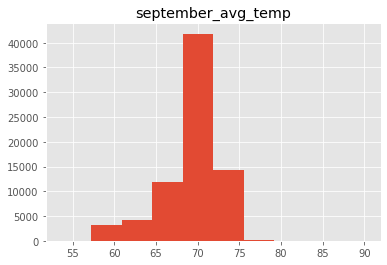

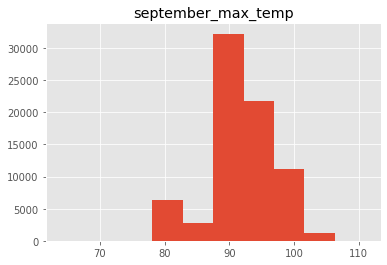

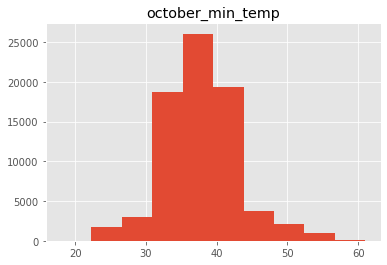

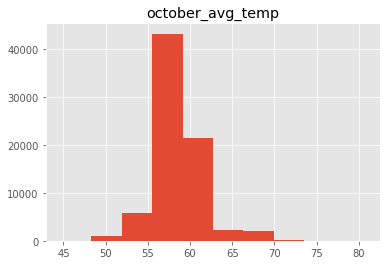

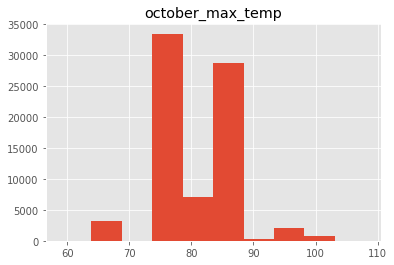

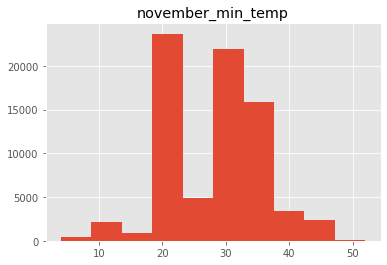

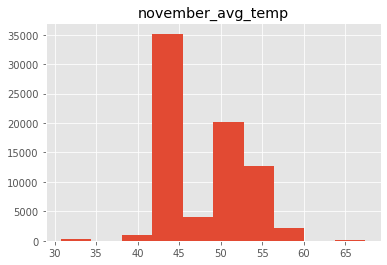

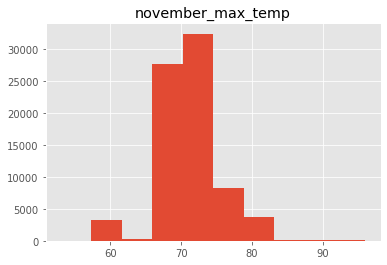

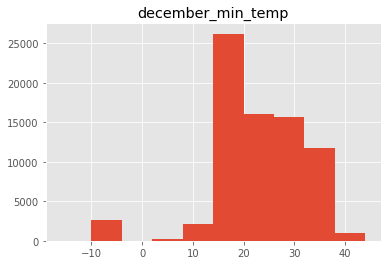

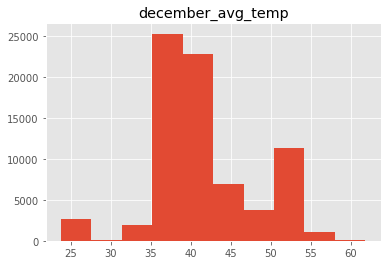

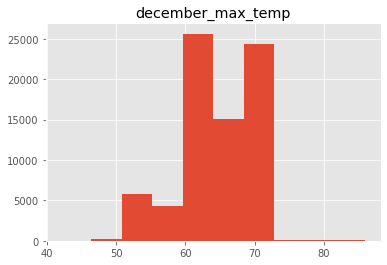

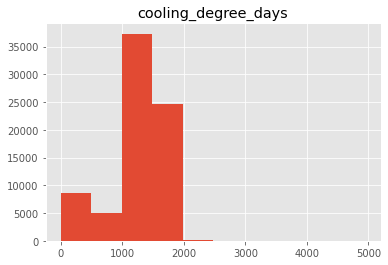

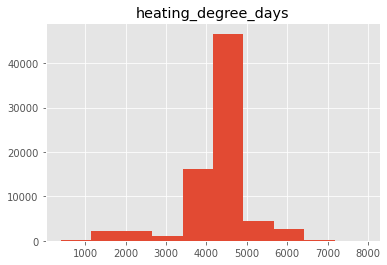

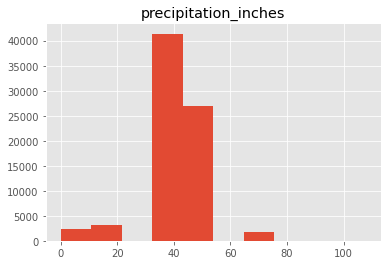

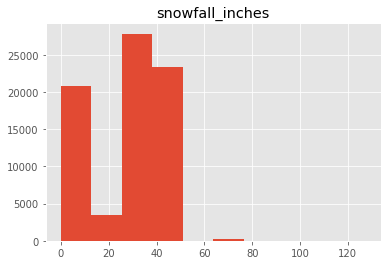

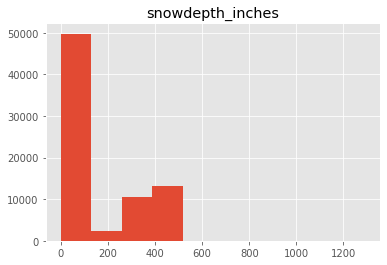

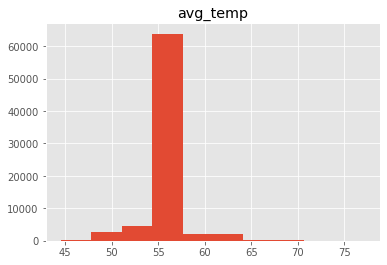

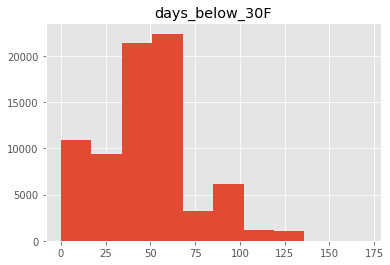

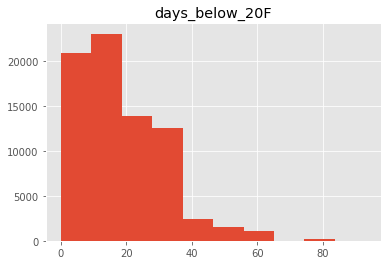

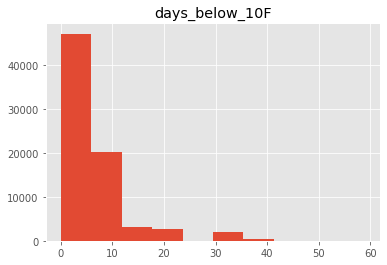

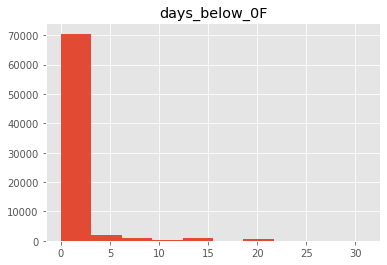

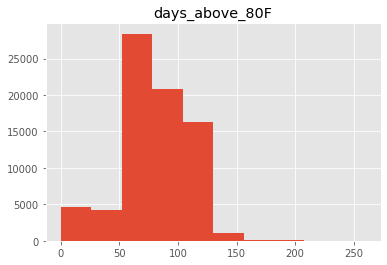

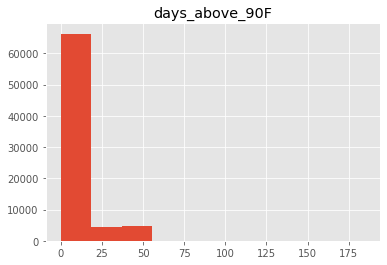

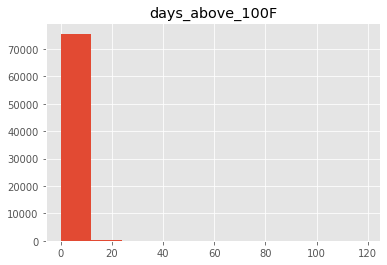

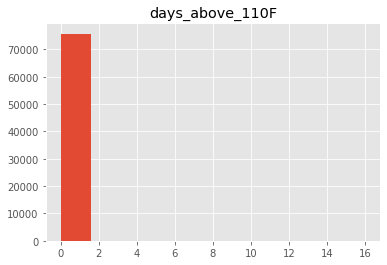

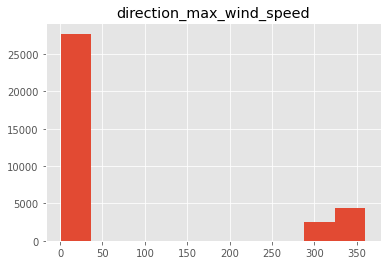

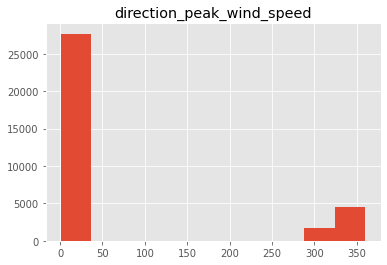

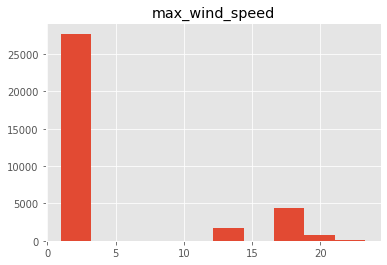

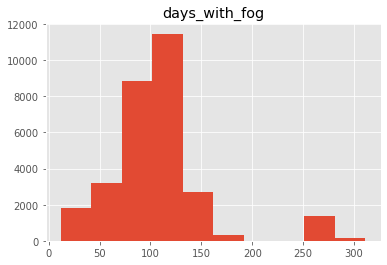

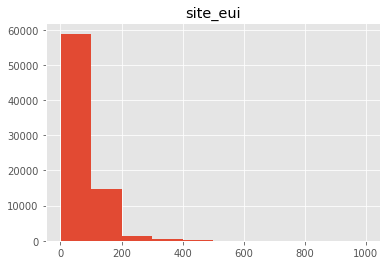

In [14]:
for i, col in enumerate(Numerical_features):
    plt.figure(i)
    eui_train[col].hist()
    plt.title(col)

In [43]:
eui_train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395


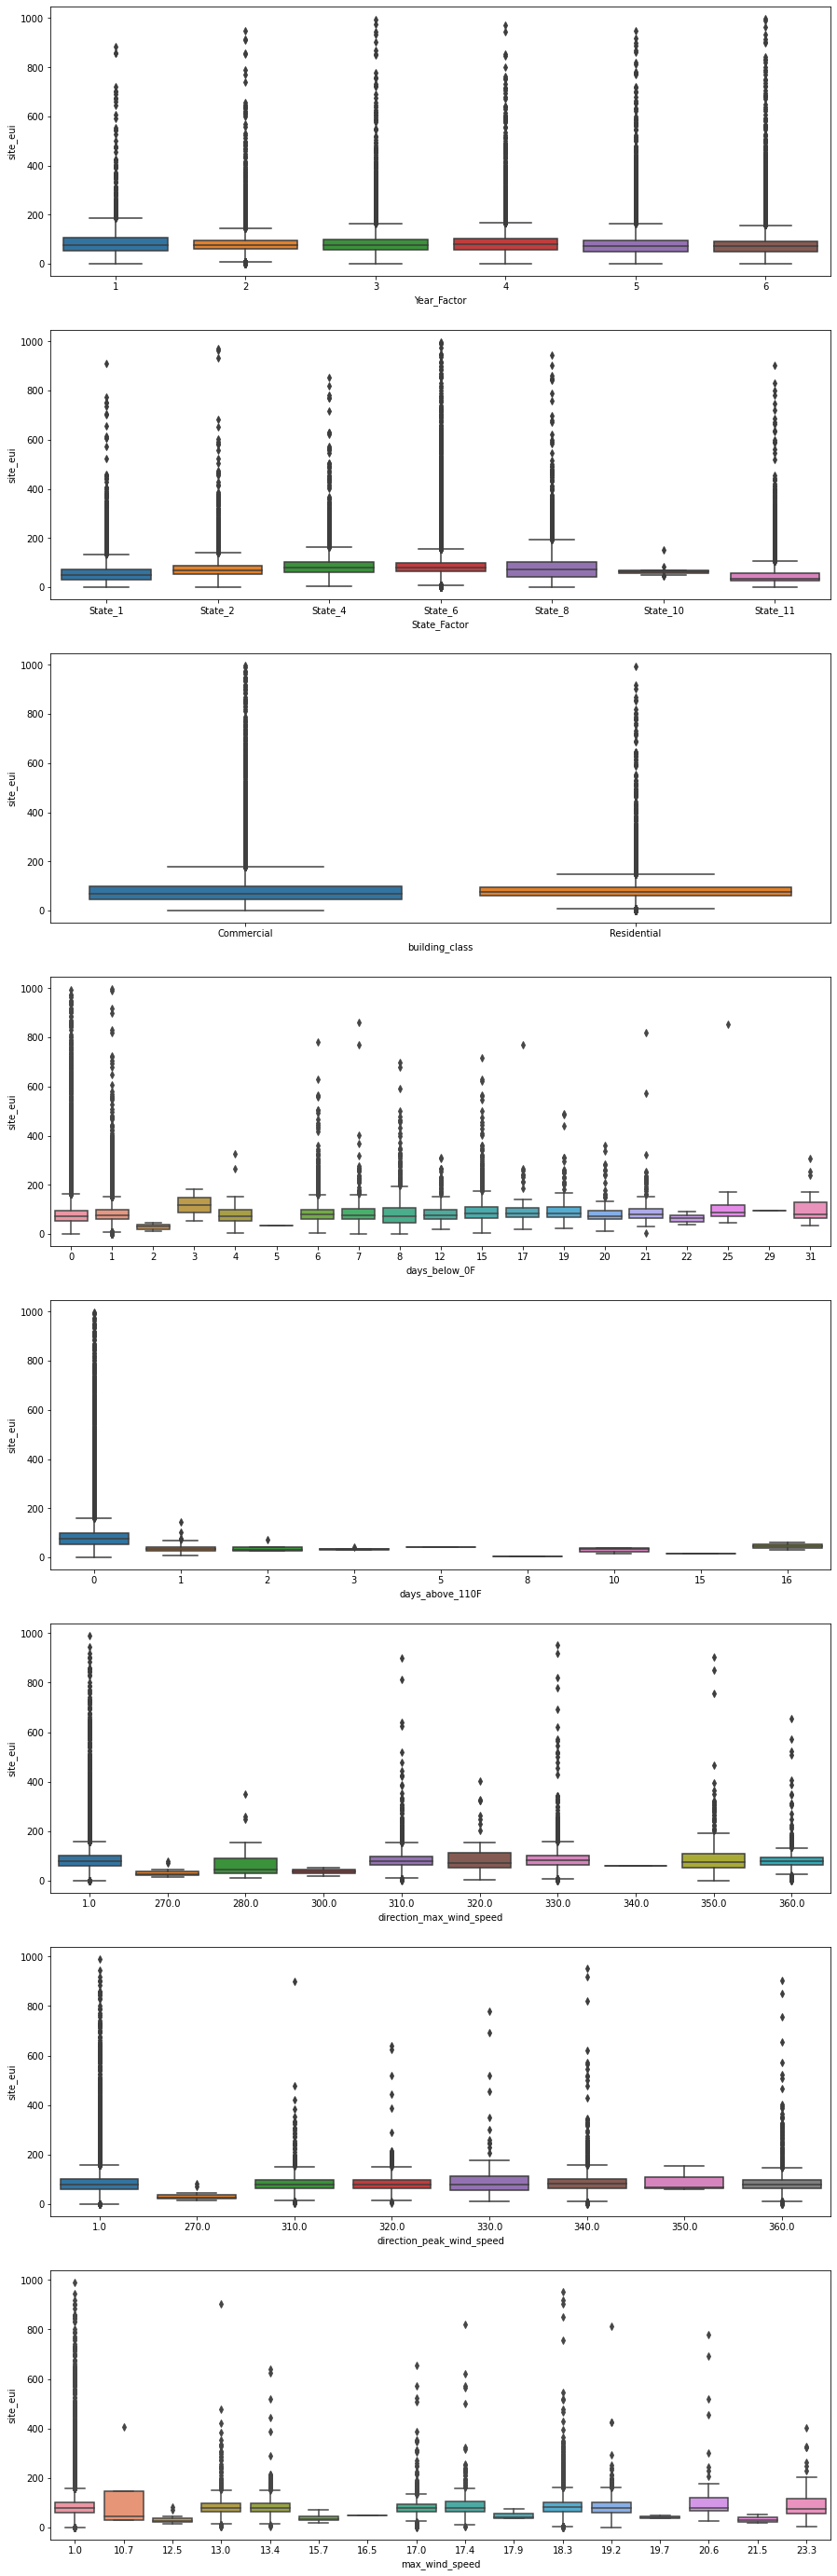

In [9]:
MAX = 30
discrete_vars = [var for var in eui_train.columns if eui_train[var].nunique() < MAX]
discrete_vars

plt.figure(figsize=(15,50))
for i, col in enumerate(discrete_vars):
    plt.subplot(len(discrete_vars), 1, i+1)
    sns.boxplot(data = eui_train, x=col, y='site_eui')
plt.show()

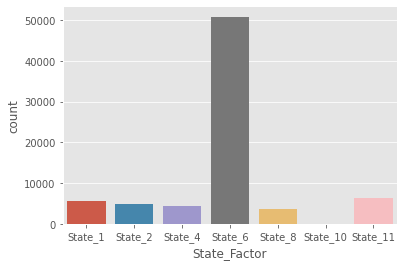

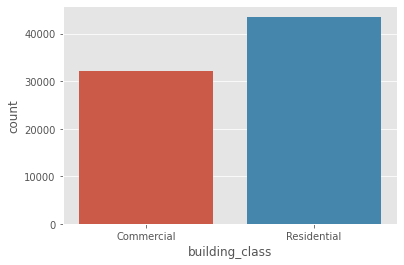

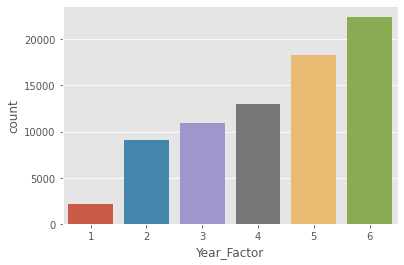

In [100]:
for i, feature in enumerate(['State_Factor', 'building_class', 'Year_Factor']):
    plt.figure(i)
    sns.countplot(eui_train[feature])

In [118]:
eui_train['facility_type'].nunique()

60

In [113]:
eui_train['facility_type'].value_counts()[:5]

Multifamily_Uncategorized    39455
Office_Uncategorized         12512
Education_Other_classroom     3860
Lodging_Hotel                 2098
2to4_Unit_Building            1893
Name: facility_type, dtype: int64

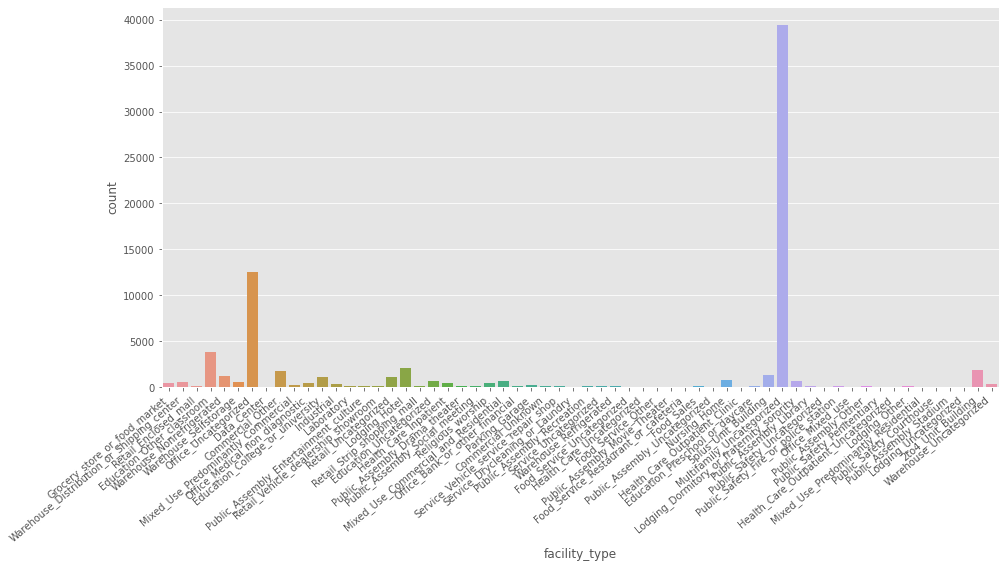

In [111]:
plt.figure(figsize=(15,7))
ax = sns.countplot(eui_train['facility_type'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=10)
plt.show()

<AxesSubplot:xlabel='building_class', ylabel='site_eui'>

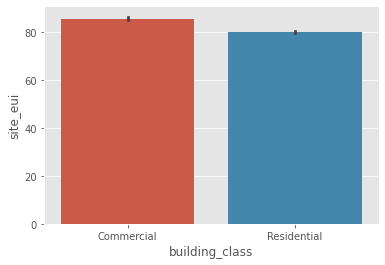

In [120]:
sns.barplot(x='building_class', y='site_eui', data=eui_train)

<AxesSubplot:xlabel='State_Factor', ylabel='site_eui'>

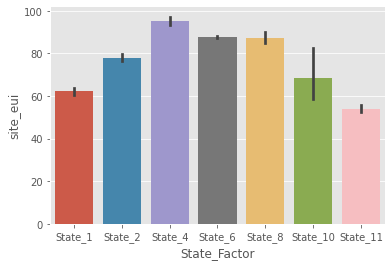

In [82]:
sns.barplot(x='State_Factor', y='site_eui', data=eui_train)

<AxesSubplot:xlabel='Year_Factor', ylabel='site_eui'>

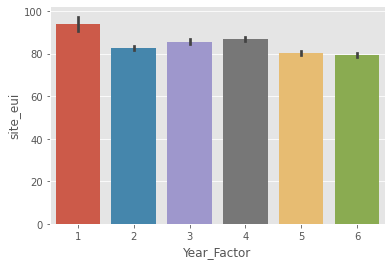

In [81]:
sns.barplot(x='Year_Factor', y='site_eui', data=eui_train)

## Correlation Analysis

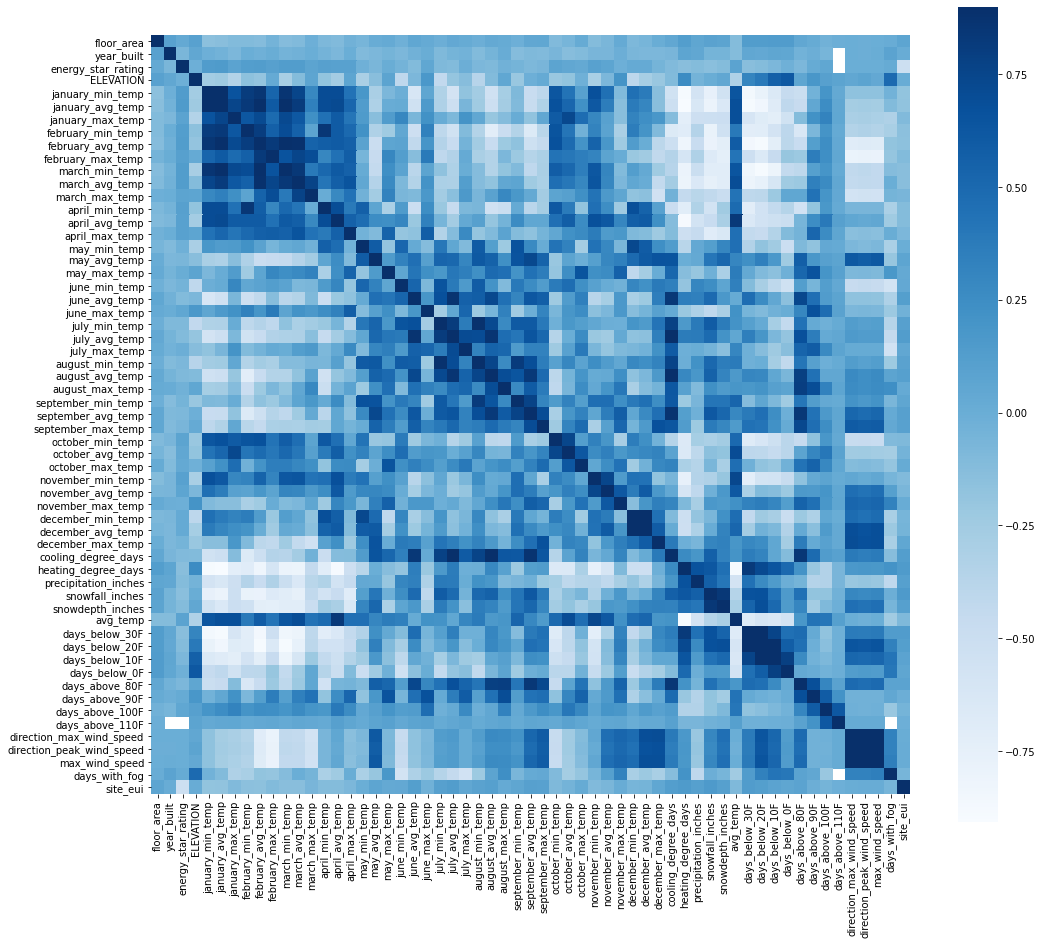

In [17]:
corr = eui_train.corr()
plt.figure(figsize=(17,15))
sns.heatmap(corr, vmax=0.9, cmap='Blues', square=True)
plt.show()

In [24]:
pos_cor = corr['site_eui'] > 0
corr['site_eui'][pos_cor].sort_values(ascending=False)[:10]

site_eui                1.000000
snowfall_inches         0.157284
heating_degree_days     0.147861
days_below_30F          0.139811
july_avg_temp           0.133856
cooling_degree_days     0.125004
june_avg_temp           0.122019
days_below_20F          0.119492
august_avg_temp         0.113786
precipitation_inches    0.113558
Name: site_eui, dtype: float64

In [26]:
pos_cor = corr['site_eui'] < 0
corr['site_eui'][pos_cor].sort_values(ascending=True)[:10]

energy_star_rating   -0.511012
january_min_temp     -0.179190
january_avg_temp     -0.167982
february_avg_temp    -0.154071
february_min_temp    -0.147348
march_avg_temp       -0.135303
march_min_temp       -0.134110
april_avg_temp       -0.113008
april_min_temp       -0.111528
february_max_temp    -0.106693
Name: site_eui, dtype: float64

### Missing Values Imputation

Categorical or Descrete => Most Frequent imputaion

Numerical Values => Average or Median

In [40]:
eui_train[eui_train['year_built'] == 0]

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
353,1,State_1,Commercial,Lodging_Hotel,204392.0,0.0,61.0,59.1,36,50.500000,...,0,14,0,0,0,66.552675,62.779974,4.190601,109.142051,82.627179
955,2,State_1,Commercial,Lodging_Hotel,204392.0,0.0,63.0,2.4,27,48.951613,...,0,113,35,1,0,1.000000,1.000000,1.000000,88.000000,87.526794
2159,3,State_1,Commercial,Lodging_Hotel,204392.0,0.0,63.0,9.1,22,44.790323,...,0,72,10,0,0,66.552675,62.779974,4.190601,109.142051,75.362740
3415,4,State_1,Commercial,Lodging_Hotel,204392.0,0.0,68.0,9.1,41,55.096774,...,0,27,6,0,0,66.552675,62.779974,4.190601,109.142051,61.793699
4535,5,State_1,Commercial,Lodging_Hotel,204392.0,0.0,76.0,9.1,29,51.387097,...,0,136,52,10,0,66.552675,62.779974,4.190601,109.142051,59.503653
5571,6,State_1,Commercial,Lodging_Hotel,204392.0,0.0,78.0,45.7,37,52.693548,...,0,16,2,0,0,66.552675,62.779974,4.190601,109.142051,60.833333


In [26]:
eui_train['year_built'].fillna(eui_train['year_built'].mode(), inplace=True)
eui_train.fillna(eui_train.mean(), inplace=True)

In [41]:
eui_train = eui_train[eui_train['year_built'] != 0]

<AxesSubplot:xlabel='year_built'>

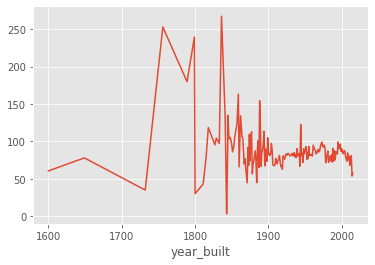

In [44]:
eui_train.groupby('year_built')['site_eui'].mean().plot()